# Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean 

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv("data/train_data.csv")
valid_data = pd.read_csv("data/valid_data.csv")

In [3]:
print(train_data.shape)
train_data.head()

(578, 2)


,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


In [4]:
print(valid_data.shape)
valid_data.head()

(184, 2)


,Date,count
0,2014-03-26,198
1,2014-03-27,120
2,2014-03-28,207
3,2014-03-29,145
4,2014-03-30,130


# Preprocessing 

In [5]:
train_data.timestamp = pd.to_datetime(train_data['Date'],format='%Y-%m-%d')
train_data.index = train_data.timestamp

In [6]:
valid_data.timestamp = pd.to_datetime(valid_data['Date'],format='%Y-%m-%d')
valid_data.index = valid_data.timestamp

Text(0.5, 1.0, 'Train and Validation Data')

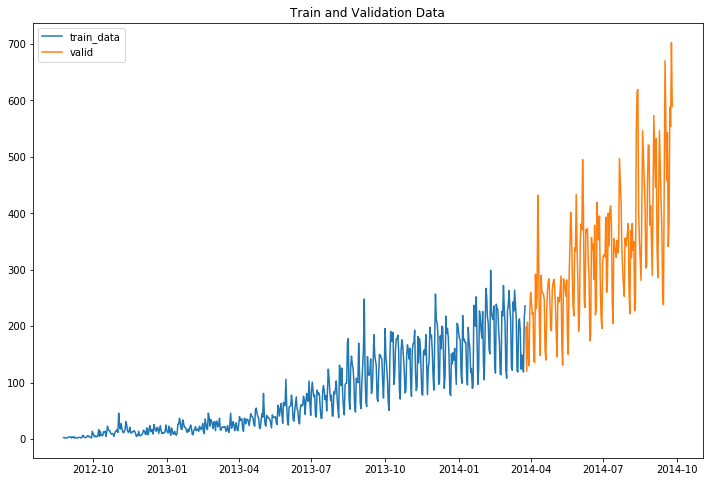

In [7]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.legend(loc='best')
plt.title("Train and Validation Data")

# Simple Average

Taking average of the complete data

In [8]:
train_data['count'].mean()

78.18166089965398

In [9]:
# Defining predictions for validation
valid_data['average_complete'] = train_data['count'].mean()

In [10]:
valid_data.head()

,Date,count,average_complete
Date,,,
2014-03-26,2014-03-26,198,78.181661
2014-03-27,2014-03-27,120,78.181661
2014-03-28,2014-03-28,207,78.181661
2014-03-29,2014-03-29,145,78.181661
2014-03-30,2014-03-30,130,78.181661


Text(0.5, 1.0, 'Simple Average Method')

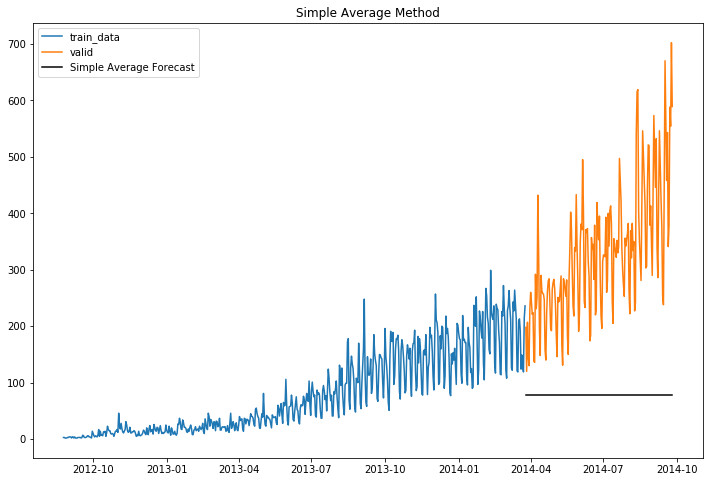

In [11]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.plot(valid_data.index,valid_data['average_complete'], label='Simple Average Forecast', color="black")
plt.legend(loc='best')
plt.title("Simple Average Method")

In [12]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['average_complete']))
print('The RMSE value for Simple Approach is', rmse)

The RMSE value for Simple Approach is 274.7203499275037


The initial values in the train data are smaller. Instead of taking the average of the complete data, we should take the average of only the recent values in order to make the predictions. 

In [13]:
train_data.tail(7)

,Date,count
Date,,
2014-03-19,2014-03-19,192
2014-03-20,2014-03-20,124
2014-03-21,2014-03-21,149
2014-03-22,2014-03-22,129
2014-03-23,2014-03-23,119
2014-03-24,2014-03-24,214
2014-03-25,2014-03-25,236


In [14]:
temp = (train_data['count'][571:578]).values
print('Lask week values are:', temp)
print('Average for last week is', temp.mean())

Lask week values are: [192 124 149 129 119 214 236]
Average for last week is 166.14285714285714


In [15]:
# Defining predictions for validation
valid_data['average_lastweek'] = temp.mean()

In [16]:
valid_data.head()

,Date,count,average_complete,average_lastweek
Date,,,,
2014-03-26,2014-03-26,198,78.181661,166.142857
2014-03-27,2014-03-27,120,78.181661,166.142857
2014-03-28,2014-03-28,207,78.181661,166.142857
2014-03-29,2014-03-29,145,78.181661,166.142857
2014-03-30,2014-03-30,130,78.181661,166.142857


Text(0.5, 1.0, 'Simple Average Method')

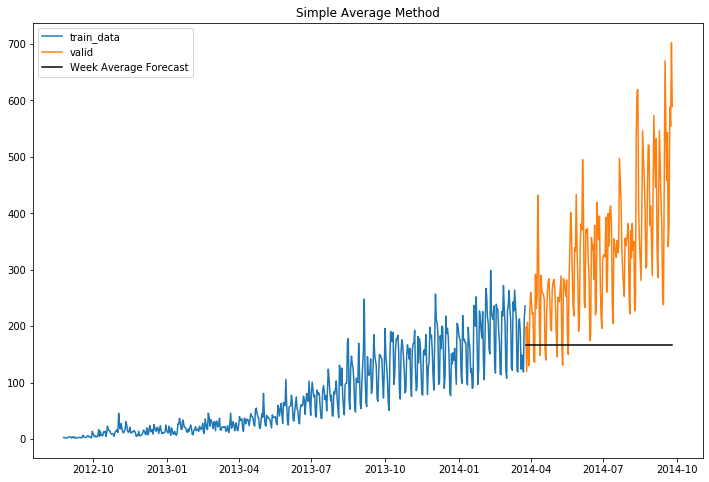

In [17]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.plot(valid_data.index,valid_data['average_lastweek'], label='Week Average Forecast', color='black')
plt.legend(loc='best')
plt.title("Simple Average Method")

In [18]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['average_lastweek']))
print('The RMSE value for Simple Approach is', rmse)

The RMSE value for Simple Approach is 198.23734967376558


This is better than the last method. Here, instead of 7 days, let's try other time duration and see which gives you more accurate results.

In [19]:
train_data.shape

(578, 2)

In [20]:
def plot(df, col):

    plt.figure(figsize=(6,4))

    plt.plot(train_data.index, train_data['count'], label='train_data')
    plt.plot(valid_data.index,valid_data['count'], label='valid')
    plt.plot(valid_data.index,valid_data[col], label= col + ' Average Forecast', color='black')
    plt.legend(loc='best')
    plt.title("Simple Average Method")
    plt.xticks(rotation=45)
    plt.show()

In [21]:
def simpleAvg(duration):
    
    temp = (train_data['count'][578-duration:578]).values
    
    print('Last {} days values are:'.format(duration), temp)
    print("---"*20)
    print('Average for last {} days is'.format(duration), temp.mean())
    
    new_col = str(duration)+'_days'
    valid_data[new_col] = temp.mean()
    
    display(valid_data.head())
    
    plot(valid_data, new_col)
    
    rmse = sqrt(mean_squared_error(valid_data['count'], valid_data[new_col]))
    print('The RMSE value for Simple Approach is', rmse)
    

Last 14 days values are: [264 239 213 121 119 209 213 192 124 149 129 119 214 236]
------------------------------------------------------------
Average for last 14 days is 181.5


,Date,count,average_complete,average_lastweek,14_days
Date,,,,,
2014-03-26,2014-03-26,198,78.181661,166.142857,181.5
2014-03-27,2014-03-27,120,78.181661,166.142857,181.5
2014-03-28,2014-03-28,207,78.181661,166.142857,181.5
2014-03-29,2014-03-29,145,78.181661,166.142857,181.5
2014-03-30,2014-03-30,130,78.181661,166.142857,181.5


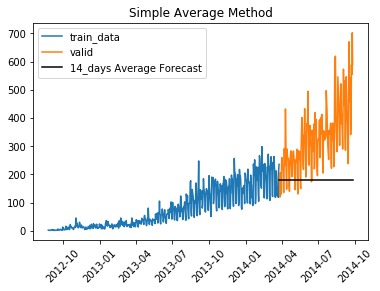

The RMSE value for Simple Approach is 185.92804826177996


In [22]:
simpleAvg(14)

Last 20 days values are: [232 212 126 122 243 227 264 239 213 121 119 209 213 192 124 149 129 119
 214 236]
------------------------------------------------------------
Average for last 20 days is 185.15


,Date,count,average_complete,average_lastweek,14_days,20_days
Date,,,,,,
2014-03-26,2014-03-26,198,78.181661,166.142857,181.5,185.15
2014-03-27,2014-03-27,120,78.181661,166.142857,181.5,185.15
2014-03-28,2014-03-28,207,78.181661,166.142857,181.5,185.15
2014-03-29,2014-03-29,145,78.181661,166.142857,181.5,185.15
2014-03-30,2014-03-30,130,78.181661,166.142857,181.5,185.15


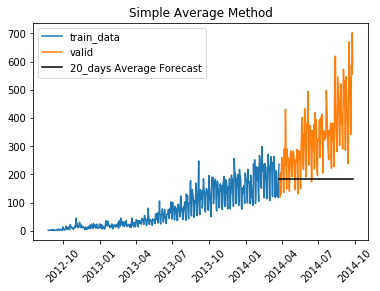

The RMSE value for Simple Approach is 183.07020125338948


In [23]:
simpleAvg(20)

Last 40 days values are: [236 134 117 239 232 229 193 171 115 114 226 218 272 231 204 122 108 228
 236 263 232 212 126 122 243 227 264 239 213 121 119 209 213 192 124 149
 129 119 214 236]
------------------------------------------------------------
Average for last 40 days is 189.775


,Date,count,average_complete,average_lastweek,14_days,20_days,40_days
Date,,,,,,,
2014-03-26,2014-03-26,198,78.181661,166.142857,181.5,185.15,189.775
2014-03-27,2014-03-27,120,78.181661,166.142857,181.5,185.15,189.775
2014-03-28,2014-03-28,207,78.181661,166.142857,181.5,185.15,189.775
2014-03-29,2014-03-29,145,78.181661,166.142857,181.5,185.15,189.775
2014-03-30,2014-03-30,130,78.181661,166.142857,181.5,185.15,189.775


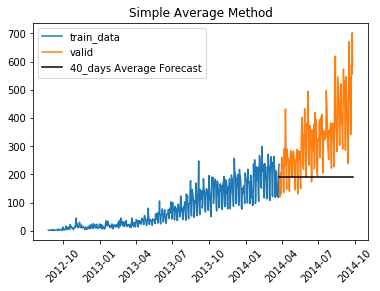

The RMSE value for Simple Approach is 179.49021583786046


In [24]:
simpleAvg(40)

Last 10 days values are: [119 209 213 192 124 149 129 119 214 236]
------------------------------------------------------------
Average for last 10 days is 170.4


,Date,count,average_complete,average_lastweek,14_days,20_days,40_days,10_days
Date,,,,,,,,
2014-03-26,2014-03-26,198,78.181661,166.142857,181.5,185.15,189.775,170.4
2014-03-27,2014-03-27,120,78.181661,166.142857,181.5,185.15,189.775,170.4
2014-03-28,2014-03-28,207,78.181661,166.142857,181.5,185.15,189.775,170.4
2014-03-29,2014-03-29,145,78.181661,166.142857,181.5,185.15,189.775,170.4
2014-03-30,2014-03-30,130,78.181661,166.142857,181.5,185.15,189.775,170.4


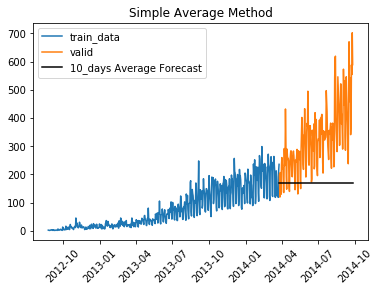

The RMSE value for Simple Approach is 194.78173180120936


In [25]:
simpleAvg(10)